# **CS985 and CS987 Assignment 2 : Twitter Sentiment Classification Problem**

#### **Team's name: Group O**

-   Chavinpat Naimee (201976778)
-   Chinnakrit Nitipornsri (201964692)
-   Kittanon Na Nakhon (201964002)
-   Nuallahong Silaung (201986533)

Open in Google Colab [Click here](https://drive.google.com/file/d/1WWWRbTJHXW2lIsC5gD6UcxLTdJbPXI58/view?usp=sharing) or https://drive.google.com/file/d/1WWWRbTJHXW2lIsC5gD6UcxLTdJbPXI58/view?usp=sharing

## **1. The Objective :**
The main analysis of this project is to classify tweets according to their sentiment (strongly negative (0), negative (1), neutral (2), positive (3), highly positive (4)) and For need to predict the each tweet sentiment. (The data comes from Classification problem: https://www.kaggle.com/t/f823a4018ad244e789ccc99710d8a3f2) 

## **2. Meaning of Dataset :**
This dataset consists of two datasets of the train and test dataset, which indicates the data of 1,000,000 rows 5 columns and 399,890 rows 4 columns respectively. However, the missing column of the test dataset is "target" column, which is the key finding of this project.
- target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- ids: The id of the tweet 
- date: the date of the tweet 
- user: the user that tweeted 
- tweet: the text of the tweet 


## **3. Overall analysis :**
> ### **3.1 Data Exploding**
- Import libraries and datasets
- Overview the information of both datasets
- Reflection on Data Exploding

> ### **3.2 Prepare the Data for Deep Learning Algorithms**
> ###### 3.2.1 Preparing data
- Created function to clean data which are text sentences.
- Applied clean_sentenses() function with both train dataset and test dataset.

> ###### 3.2.2 Spliting the train data and segment test data
- Splitting the train data and segment test data
- Initializing tokenizer of keras and subsequent padding
- Use Early Stopping to Halt the Training of Neural Networks At the Right Time

> ### **3.3 Deep Learning Analysis Models**
> ###### 3.3.1 Long Short Term Memory networks (LSTM network)
> ###### 3.3.2 Training the model
> ###### 3.3.3 Evaluation the model
> ###### 3.3.4 Making prediction

## **4. Conclusion**

> #### **Required packages**
- from google.colab import files
- import numpy as np
- import pandas as pd
- import os
- import warnings
- import tensorflow as tf
- from tensorflow import keras
- import nltk
- from nltk.tokenize import word_tokenize
- from nltk.stem import WordNetLemmatizer
- from bs4 import BeautifulSoup
- import re 
- from tqdm import tqdm
- from keras.utils import to_categorical
- import random
- from tensorflow import set_random_seed
- from sklearn.model_selection import train_test_split
- from keras.preprocessing import sequence
- from keras.preprocessing.text import Tokenizer
- from keras.layers import Dense,Dropout,Embedding,LSTM
- from keras.callbacks import EarlyStopping
- from keras.losses import categorical_crossentropy
- from keras.optimizers import Adam
- from keras.models import Sequential
- from collections import Counter
- import matplotlib.pyplot as plt

# **3. Overall analysis**

## **3.1 Data Exploding**

#### **3.1.1 Starting with import libraries and datasets**

##### ***In term of running on Google colab***
This stage is connected and loaded data through Kaggle.

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aimmyy","key":"02d33fa5c51961209742b72f3326881d"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!pip install kaggle

In [0]:
!kaggle competitions download -c cs98x-twitter-sentiment --force

 77% 44.0M/57.3M [00:00<00:00, 74.8MB/s]
100% 57.3M/57.3M [00:00<00:00, 83.9MB/s]
 92% 21.0M/22.8M [00:00<00:00, 85.8MB/s]
100% 22.8M/22.8M [00:00<00:00, 90.3MB/s]


In [0]:
#!python3 -m pip install --upgrade tensorflow

##### ***Starting with import libralies and datasets***

In [0]:
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
# To check version of tensorflow and keras
from tensorflow import keras 
print('Tensorflow version',tf.__version__)
print('Keras version',keras.__version__)

Tensorflow version 2.2.0-rc2
Keras version 2.3.0-tf


In [0]:
#The Natural Language Toolkit, or more generally NLTK, for English written in the Python programming language, 
#is a suite of libraries and programs for symbolic and statistical natural language processing.
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import re # import Regular Expression (re) package for string management

#TQDM is a progress bar library with good support for nested loops and Jupyter/IPython notebooks.
from tqdm import tqdm

In [0]:
from keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Dropout,Embedding,LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential

#set random seed for the session and also for tensorflow that runs in background for keras
tf.random.set_seed(123)
random.seed(123)

Using TensorFlow backend.


In [0]:
# Read training & test datasets by pandas package
import pandas as pd
train = pd.read_csv("/content/training.csv.zip")
test = pd.read_csv("/content/test.csv.zip")

#### **3.1.2 Providing an overview of information of both datasets**

In [0]:
# To show sample of train dataset
train.head()

,target,id,date,user,text
0,0,2224496154,Thu Jun 18 09:34:25 PDT 2009,Deborah_Fay,Okay for some reason I still can't get the ba...
1,4,1687934301,Sun May 03 09:56:56 PDT 2009,haills,http://twitpic.com/4hjnj - Don't worry be happ...
2,0,1972073814,Sat May 30 08:30:21 PDT 2009,lechellealice,this movie is so sad
3,4,1557632618,Sun Apr 19 05:13:47 PDT 2009,janeslee,Good afternoon world. Been too busy to tweet. ...
4,4,1969750122,Sat May 30 01:05:20 PDT 2009,bvdaily,@QueensleyFelix LOL!We are just too classy I ...


In [0]:
# Print shape of train set
train.shape

(1000000, 5)

In [0]:
# To get Number of columns, Index, Datatype and Memory information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1000000 non-null  int64 
 1   id      1000000 non-null  int64 
 2   date    1000000 non-null  object
 3   user    1000000 non-null  object
 4   text    1000000 non-null  object
dtypes: int64(2), object(3)
memory usage: 38.1+ MB


In [0]:
# To find and count 'NaN' in datasat
train.isnull().sum()

target    0
id        0
date      0
user      0
text      0
dtype: int64

Text(0.5, 1.0, 'Dataset labels distribuition')

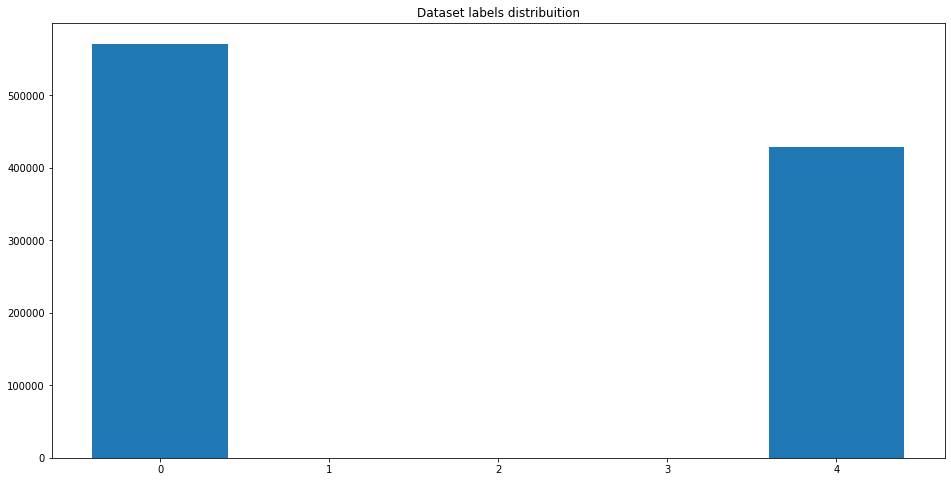

In [0]:
from collections import Counter
# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

target_cnt = Counter(train.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [0]:
# To show sample of test dataset
test.head()

,id,date,user,text
0,1974447176,Sat May 30 13:09:18 PDT 2009,ugro,That's pretty much how I think it works with i...
1,1752584531,Sat May 09 22:20:24 PDT 2009,infinities,Holy awesome Leonard Nimoy! Also thought I sp...
2,2265878673,Sun Jun 21 07:29:15 PDT 2009,revybbcholic,@theodorainish yes they are I've tried to not...
3,1995188099,Mon Jun 01 13:05:22 PDT 2009,teddyrised,Millvina Dean the last known survivor of the ...
4,2071942859,Sun Jun 07 20:08:43 PDT 2009,kaylabeth_,I REALLY DO NOT LIKE THIS ROGER. Adam Pascal p...


In [0]:
# Print shape of test set
test.shape

(399890, 4)

In [0]:
# To get Number of columns, Index, Datatype and Memory information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399890 entries, 0 to 399889
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      399890 non-null  int64 
 1   date    399890 non-null  object
 2   user    399890 non-null  object
 3   text    399890 non-null  object
dtypes: int64(1), object(3)
memory usage: 12.2+ MB


In [0]:
# To find and count 'NaN' in datasat
test.isnull().sum()

id      0
date    0
user    0
text    0
dtype: int64

#### **3.1.3 Reflection on Data Exploding**



The dataset structure provides rows and columns in the dataset, which represents one district provided five attributes including target, id, date, user and text. Moreover, there are 1,000,000 instances in the training set and 399,890 instances in a testing set, which seems to be a large amount of data. Furthermore, using train.info() and test.info() to illustrate data structure. Additionally, it can be seen that the data is entirely perfect, which is not have any missing values by using train.isnull().sum() and test.isnull().sum() to check the train and test dataset.
However, it seems that there are going to expect 3 class labels: negative, neutral or positive, but the training data has only two classes. The class names are disproportionate as can be seen in the chart. That is something that should bear in mind during the training process of the model.

## **3.2 Prepare the Data for Deep Learning Algorithms**

#### **3.2.1 Preparing Data**



The data surrounding social media is unstructured. That means it is raw, noisy and needs to be cleaned before beginning to work on the model of sentiment analysis. It is a crucial phase because the data quality would result in more accurate performance.

This preparing data, clean_sentences() function is created to cleaning data. It included the steps are removing HTML content, removing non-alphabetic characters, tokenization the sentences and lemmatization each word to its lemma by used BeautifulSoup() library, Regular Expression (re) package, word_tokenize() library and lemmatizer() library, respectively. 
- It looks as though HTML encoding was not translated to text, and ended up as '& amp,'&quot', etc. In text area. Decoding HTML into general text will be the first step in preparing the data. For that, it will be used BeautifulSoup.
- Regular Expression (re) package, which parses and efficiently modifies strings without having to iterate directly through the characters comprising the string in concern.
- Lemmatization is the process of normalizing a word, instead of merely finding its centre. A suffix can not only be omitted in the process but may also be replaced with another. It can also include deciding the part-of-speech for a word first and then applying the rules for normalization. It can also require look-up of dictionaries.

We also imported milk, which is the Natural Processing Toolkit, one of the most widely used libraries of Python out there. It is responsible for any processing we need to do on text to alter its shape or remove other components from it. Additionally, these are applied both train dataset and test dataset. 

##### ***3.2.1.1 Created function to clean data which are text sentences.***

In [0]:
def clean_sentences(df):
    reviews = []

    for sent in tqdm(df['text']):
        
        #remove html content
        review_text = BeautifulSoup(sent).get_text()
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #tokenize the sentences
        words = word_tokenize(review_text.lower())
    
        #lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in words]
    
        reviews.append(lemma_words)

    return(reviews)

In [0]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

##### ***3.2.1.2 Applied clean_sentenses() function with both train dataset and test dataset.***

In [0]:
#cleaned reviews for both train and test set retrieved
train_sentences = clean_sentences(train)
test_sentences = clean_sentences(test)
print(len(train_sentences))
print(len(test_sentences))

100%|██████████| 399890/399890 [02:40<00:00, 2496.19it/s]

1000000
399890


#### **3.2.2 Spliting the train data and segment test data**


According to the obstruction of the testing dataset that has no target column of the target, then the training dataset has to be used as both training and testing. However, the evaluation of a model skill only the training dataset would result in a biased score. To avoid prediction bias of the dataset, it has to split into three datasets that are training, validation and testing set—starting from separate both datasets into training data and validation data as 80% and 20%, respectively.

- The training set is used for learning, that is to fit the parameters of the Classification.
- The validation set is used to tune the parameters of the Classification.
- The test set is used only to assess the performance of a fully-specified Classification.

In [0]:
target=train.target.values
y_target=to_categorical(target)
num_classes=y_target.shape[1]

##### ***3.2.2.1 Splitting the train data and segment test data***

In [0]:
X_train,X_val,y_train,y_val=train_test_split(train_sentences,y_target,test_size=0.2,stratify=y_target)

##### ***3.2.2.2 Initializing tokenizer of keras and subsequent padding***


This process found the maximum length of the list of unique words which is 52. Moreover, the TensorFlow (Keras) Tokenizer class is used to simplify the training data tokenization. The first step is to build the Tokenizer object, including the maximum number of words to be retained in vocabulary after tokenization, as well as a vocabulary token to be used to encrypt test data words that it did not find in training, in which such previously unknown words would be dropped out of vocabulary and suddenly uncounted. Upon development of the Tokenizer, fit it on the training data. Now there are tokenized data and also have a vocabulary to map words to numeric representation. The second step is to encode sequences using this. The last step, the encoded sequences are required to be of the same length. We have just discovered the length of the most extended sequence and will use it to pad all other sequences at the end with extra '0's and also truncate any sequences longer than the maximum length from the end.

In [0]:
unique_words = set()
len_max = 0

for sent in tqdm(X_train):
    
    unique_words.update(sent)
    
    if(len_max<len(sent)):
        len_max = len(sent)
        
#length of the list of unique_words gives the no of unique words
print(len(list(unique_words)))
print(len_max)

100%|██████████| 800000/800000 [00:01<00:00, 499556.15it/s]


358840
52


In [0]:
tokenizer = Tokenizer(num_words=len(list(unique_words)))
tokenizer.fit_on_texts(list(X_train))

#texts_to_sequences(texts)

    # Arguments- texts: list of texts to turn to sequences.
    #Return: list of sequences (one per text input).
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)
X_test = tokenizer.texts_to_sequences(test_sentences)

#LSTM networks needs all inputs to be same length.

X_train = sequence.pad_sequences(X_train, maxlen=len_max)
X_val = sequence.pad_sequences(X_val, maxlen=len_max)
X_test = sequence.pad_sequences(X_test, maxlen=len_max)

print(X_train.shape,X_val.shape,X_test.shape)

(800000, 52) (200000, 52) (399890, 52)


##### ***3.2.2.3 Use Early Stopping to Halt the Training of Neural Networks At the Right Time***

An problem with training neural networks is choosing how many training epochs to use. Too many epochs can result in the training dataset being overfitted, while too few can result in the model being underfit. Early stopping is a method that allows you to assign a large arbitrary number of training epochs and stop training until the output of the model stops improving on a validation dataset.The callback allows the performance indicator to be defined to evaluate the trigger and once activated, the training cycle will be stopped.

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_acc', patience = 2)
callback = [early_stopping]

## **3.3 Deep Learning Analysis Models**

#### **3.3.1 Long Short Term Memory networks (LSTM network)**


This Twitter Sentiment Classification used LSTM network to analysis. This model is a specialized form of recurrent neural network (RNN) — a neural network architecture used for sequential data modelling and also applied to tasks related to natural language processing. The benefit of LSTMs over conventional RNNs is that they maintain information for long periods, allowing valuable knowledge learned early in the sequence to have a more significant effect on the end-of-sequence model decisions. In order to get the best result, this model was trained with Adam optimizer, and it has the best performance when the learning rate is 0.005 because Adam is faster than the others and it does not suffer any significant decreases inaccuracy. Furthermore, softmax is the most appropriate for the final layer to normalize the training data, and this will give an output into a probability for calculating negative log-likelihood into cross-entropy loss.

In [0]:
#Model using Keras LSTM

model = tf.keras.models.Sequential([
                                    
    tf.keras.layers.Embedding(len(list(unique_words)),300,input_length=len_max),
    tf.keras.layers.LSTM(256,dropout=0.25, recurrent_dropout=0.25,return_sequences=True), # returns a sequence of vectors of dimension 256
    tf.keras.layers.LSTM(128,dropout=0.25, recurrent_dropout=0.25,return_sequences=True), # returns a sequence of vectors of dimension 128
    tf.keras.layers.LSTM(64,dropout=0.25, recurrent_dropout=0.25,return_sequences=False), # returns a sequence of vectors of dimension 64
    tf.keras.layers.Dense(100,activation='relu'), # Dense(100) is a fully-connected layer with 100 hidden units.
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(num_classes,activation='softmax')
    #tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 52, 300)           107652000 
_________________________________________________________________
lstm (LSTM)                  (None, 52, 256)           570368    
_________________________________________________________________
lstm_1 (LSTM)                (None, 52, 128)           197120    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 100)               6500      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [0]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.005)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

#### **3.3.2 Training the Model**



The numbers of epochs are related to how diverse the dataset. 
As the number of epochs increases, more number of times the weight is changed, the curve could be interpreted as underfitting to optimal to overfitting curve. However, this project set a high number of epochs so that it would provide in evaluating the model section. This model will give the best performance when epoch is equal to 2 because when increasing the number of epoch to 3 and 4, this model tends to have overfitting from an increasing of validation loss and validation accuracy that did not show significant improvement.

In [0]:
#Cross validation could be used to evaluate the model and grid search further to find unique combination of parameters that give maximum accuracy. 
#This model has a validation accuracy of around 82%

batch_size=2048
epochs=8

history=model.fit(X_train, y_train, validation_data=(X_val, y_val),
                  epochs=epochs, 
                  #steps_per_epoch=len(X_train)//batch_size,
                  batch_size=batch_size, 
                  verbose=1,
                  validation_steps=50, 
                  callbacks=callback)

Epoch 1/8
391/391 [==============================] - 419s 1s/step - loss: 0.6268 - accuracy: 0.6345 - val_loss: 0.4329 - val_accuracy: 0.8016
Epoch 2/8
391/391 [==============================] - 416s 1s/step - loss: 0.3974 - accuracy: 0.8227 - val_loss: 0.3885 - val_accuracy: 0.8252
Epoch 3/8
391/391 [==============================] - 415s 1s/step - loss: 0.2747 - accuracy: 0.8861 - val_loss: 0.4373 - val_accuracy: 0.8169
Epoch 4/8
391/391 [==============================] - 414s 1s/step - loss: 0.2120 - accuracy: 0.9118 - val_loss: 0.5108 - val_accuracy: 0.8095
Epoch 5/8
391/391 [==============================] - 415s 1s/step - loss: 0.1758 - accuracy: 0.9266 - val_loss: 0.6036 - val_accuracy: 0.8096
Epoch 6/8
391/391 [==============================] - 415s 1s/step - loss: 0.1543 - accuracy: 0.9353 - val_loss: 0.6667 - val_accuracy: 0.8043
Epoch 7/8
391/391 [==============================] - 415s 1s/step - loss: 0.1392 - accuracy: 0.9423 - val_loss: 0.7477 - val_accuracy: 0.8069
Epoch 

#### **3.3.3 Evaluating the Model**



The learning curve graph provides a comparison between training loss and validation loss by changing several epochs. It could be interpreted as several epochs equal two is the best. The plot of training loss decreases to the point of stability, and the plot of validation loss decreases to the point of stability and has a small gap with the training loss. Moreover, graph also shows the comparison between training accuracy and validation accuracy by changing some epochs. It illustrates that the best accuracy is at epoch equal two because the line graph has increased when starting and reaches the highest while the validation loss is the least.

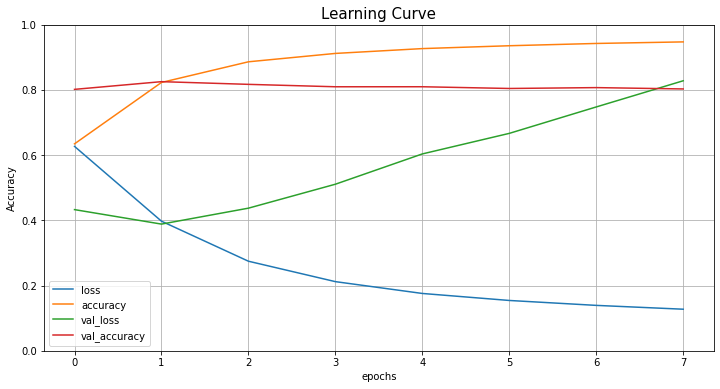

In [0]:
# Plot Learning curve
pd.DataFrame(history.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Learning Curve', fontsize=15)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

In [0]:
model.evaluate(X_val, y_val)

6250/6250 [==============================] - 243s 39ms/step - loss: 0.8346 - accuracy: 0.8018


[0.8346390128135681, 0.8018350005149841]

#### **3.3.4 Making prediction**

In multi-class sentiment analysis, the output is a probability distribution over n possible classes or, in other words, a list of n non-negative numbers that add up to 1. In this project, the value is a distribution of probability across three groups (n = 3). One may order the three probabilities as follows: negative probability, neutral probability, and positive probability. According to the training dataset has only two classes, negative and positive, hence finding the maximum probability and assign value is neutral when a probability less or equal 0.55. 

However, classification accuracy slightly decreases with an increase in the number of sentiments. It means that two classes are more accuracy than three classes.

In [0]:
predictions_test = model.predict_classes(X_test)
predictions_test

array([4, 4, 0, ..., 0, 0, 4])

In [0]:
predictions_prob = model.predict_proba(X_test)
predictions_prob

Instructions for updating:
Please use `model.predict()` instead.


array([[9.4425315e-03, 1.2082676e-19, 6.2663326e-19, 2.4293886e-19,
        9.9055743e-01],
       [2.6758917e-04, 1.3580329e-30, 2.4612679e-29, 2.6991026e-30,
        9.9973243e-01],
       [9.9879706e-01, 1.4440527e-13, 1.1050838e-13, 4.8450403e-14,
        1.2029129e-03],
       ...,
       [8.5042417e-01, 4.3972000e-06, 3.3546121e-06, 2.7377250e-06,
        1.4956538e-01],
       [9.8453993e-01, 5.0507382e-10, 3.6428960e-10, 1.9643293e-10,
        1.5460077e-02],
       [8.2494998e-03, 2.3986083e-20, 1.3868537e-19, 5.2090306e-20,
        9.9175054e-01]], dtype=float32)

In [0]:
def predict_sentiment(pred_prob,label):
    pred_prob_max = np.max(pred_prob,1)
    for i in range(np.size(pred_prob_max,0)):
      if pred_prob_max[i] <= 0.55:      
          label[i] = 2
      else:
          label[i] = label[i]
    return label

In [0]:
predictions = predict_sentiment(predictions_prob,predictions_test)
predictions

array([4, 4, 0, ..., 0, 0, 4])

In [0]:
test1 = test.copy()
test1["target"] = predictions

Text(0.5, 1.0, 'predictions distribuition')

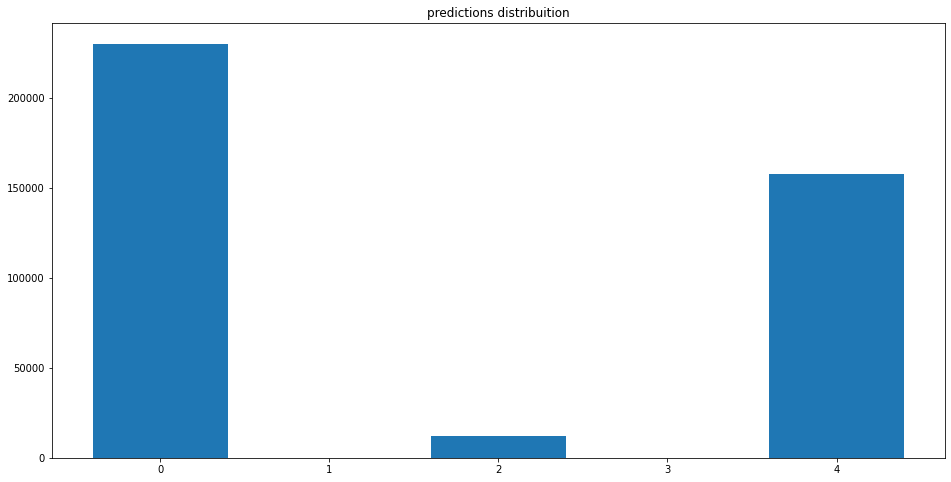

In [0]:
from collections import Counter
# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

target_cnt = Counter(test1.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("predictions distribuition")

# **4. Conclusions**

The main will present all pre-processing methods, text representation, and advanced classification algorithms in this project. The model approach's final accuracy is 80.18 percent. In the end, we decided to apply a representation of a neural network in the Kaggle competition. The best model trained can achieve 82.284 percent predictive accuracy.

In the future project, we will concentrate on developing hybrid approaches where multiple models and techniques are combined to improve the accuracy of classification reached by individual models or techniques. Moreover, consideration of emoji labelling and a better and more extensive collection of emoji datasets along with proper labelling may help improve the performance.

# **Submission Model**

In [0]:
test1 = test.copy()
test1["target"] = predictions_test
#test1["target"] = predictions
submission = test1[["id","target"]]
submission.to_csv("submission.csv", index=False)

In [0]:
!kaggle competitions submit -c cs98x-twitter-sentiment -f submission.csv -m "Message"

100% 4.96M/4.96M [00:01<00:00, 2.64MB/s]
Successfully submitted to CS98X Twitter Sentiment Classification